# Explore here

                  Nombre  Duracion  Popularidad
3               EL TONTO      3.13           67
5  La Niña de la Escuela      3.41           66
7               Casanova      4.06           65
6           SIN AUTOTUNE      2.69           64
8            M.A - Remix      4.55           63
9                  VERDE      2.09           63
2              1000COSAS      3.99           54
0       LA REINA - REMIX      3.42           54
1               LA REINA      2.50           53
4     PERREITO PA LLORAR      3.55           51


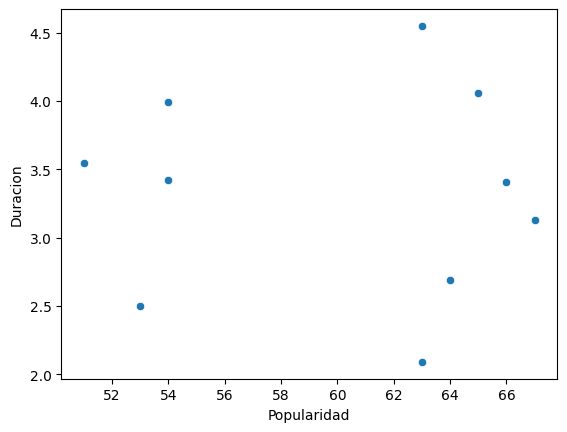

In [1]:
import os
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

spotipy.Spotify()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

birdy_uri= "3bvfu2KAve4lPHrhEFDZna"
spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

#results = spotify.artist_albums(birdy_uri, album_type='album')
listado = spotify.artist_top_tracks(birdy_uri)
canciones = {"Nombre":[],"Duracion":[],"Popularidad":[]}
for cancion in listado['tracks'][:10]:
    canciones["Nombre"].append(cancion["name"])
    canciones["Duracion"].append(round(cancion["duration_ms"]/(1000*60),2))
    canciones["Popularidad"].append(cancion["popularity"])

#print(canciones)

masPopularesDF = pd.DataFrame(canciones)
top10 = masPopularesDF.sort_values(["Popularidad"], ascending = False)

print(top10.head(10))

scatter_plot = sns.scatterplot(data = top10, x = "Popularidad", y = "Duracion")
fig = scatter_plot.get_figure()

¿Tiene relación la duración con la popularidad? ¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más? Analízalo graficando un scatter plot y argumenta tu respuesta.

No tiene porque estar relacionado que una cancion cuanto mas dure sea mas popular, la mas popular 3:13 y una popularidad de 67 y otra que dura 2:15 tiene una popualridad de 63.